In [1]:
# General important stuff
import control as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyphotonicsims.control_systems.control_core import *
from pyphotonicsims.control_systems.calculate_laser_noise import *
from pyphotonicsims.laser_dynamics.semiconductor_laser import *

from scipy.integrate import odeint, RK45, solve_ivp

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

In [7]:
laser = LaserModel('vcsel')

-----------------REPORT------------------
Cavity Q:      2.7e+03
Active loss:   464.5 MHz
Passive loss:  22256.8 MHz
Cavity loss:   22721.3 MHz
Mirror loss:   48505.7 MHz
g_th:          1645.8 cm^(-1)
N_th:          3.89e18 cm^(-3)
I_th:          0.7 mA
eta_d:         68.1 %


c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:164: RuntimeWarning: invalid value encountered in log
  g = self.g0 / (1 + self.eps * Np) * (np.log(Ne + self.N_s) - np.log(self.N_tr + self.N_s))
c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:249: RuntimeWarning: overflow encountered in double_scalars
  laser.A * Ne + laser.B * Ne ** 2 + laser.C * Ne ** 3) - laser.v_g_a * g * Np,


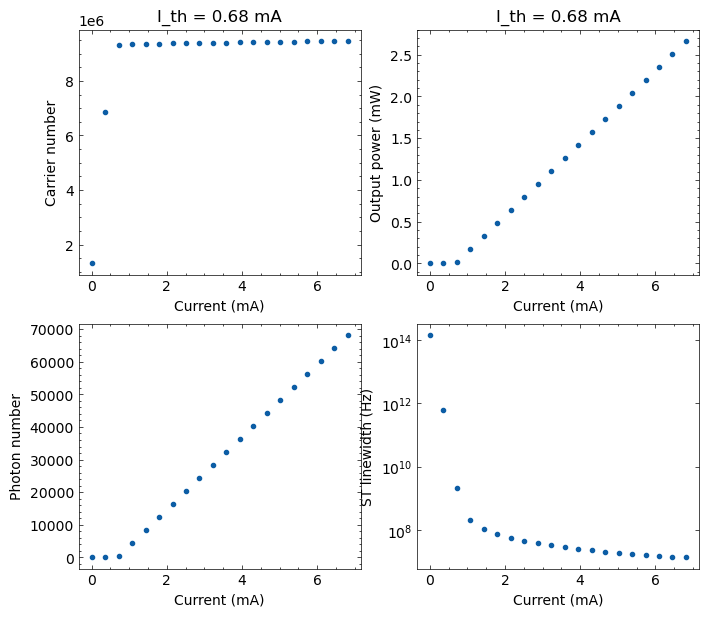

In [8]:
Ix = np.linspace(0,10*laser.I_th,20)
laser.PI_visulization(Ix,plotindensity=False)

Text(0.5, 0, 't')

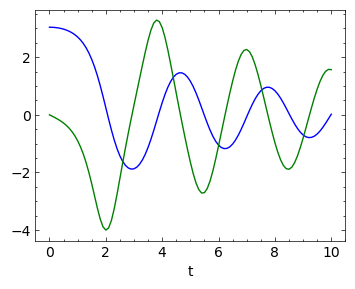

In [4]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)
sol = odeint(pend, y0, t, args=(b, c))
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.xlabel('t')

Text(0.5, 0, 't')

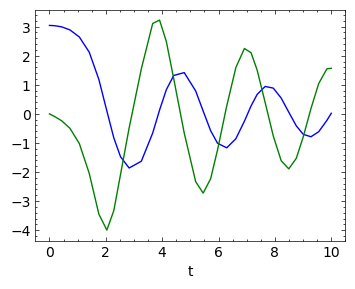

In [5]:
def pend(t, y, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
sol = solve_ivp(pend, [0, 10], y0, args=(b, c), rtol = 1e-4)
t = sol['t']
y = sol['y']
plt.plot(t, y[0,:], 'b', label='theta(t)')
plt.plot(t, y[1,:], 'g', label='omega(t)')
plt.xlabel('t')